In [27]:
import pandas as pd
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist
import matplotlib.pylab as plt

In [10]:
data = pd.read_csv("C:\\Users\\nthambat\\Downloads\\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [14]:
data.rename(columns={'Unnamed: 0':'states'},inplace=True)

In [47]:
data.isna().sum()

states            0
Murder            0
Assault           0
UrbanPop          0
Rape              0
Crime_clusters    0
dtype: int64

In [36]:
X = data[['Murder', 'Assault', 'Rape', 'UrbanPop']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 50 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,cluster_errors,num_clusters
0,200.000000,1
1,104.961633,2
2,80.115640,3
3,57.554259,4
4,50.051197,5
5,44.186032,6
6,40.041932,7
7,35.630218,8
8,31.606211,9
9,28.167917,10


In [38]:

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

data['Crime_clusters'] = clusters.labels_
data.head()
data.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


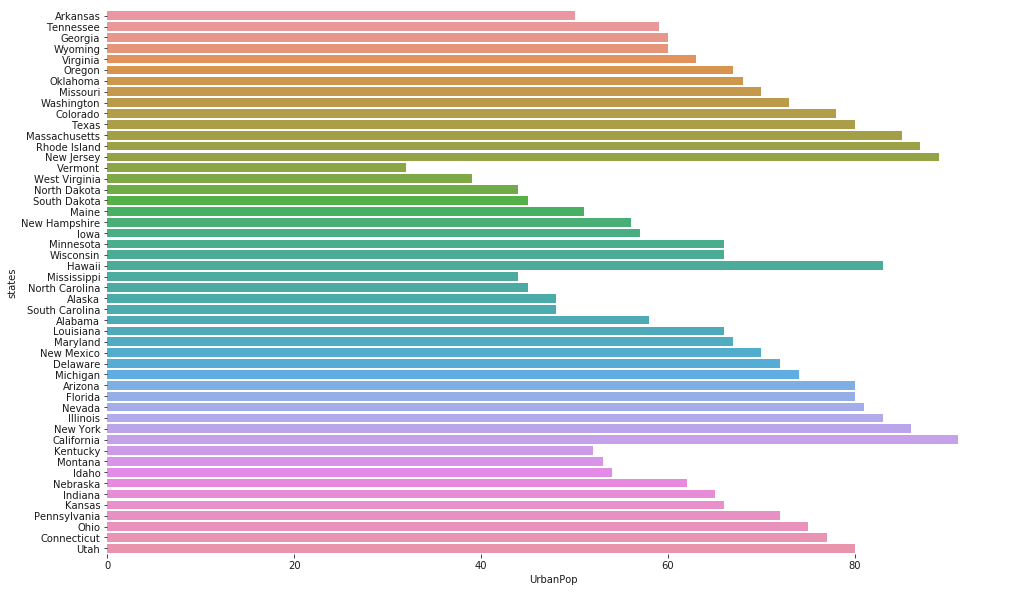

In [46]:
import seaborn as sns
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = data.sort_values([ "Crime_clusters", "UrbanPop"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="states", x="UrbanPop", data=stats)

sns.despine(left=True, bottom=True)

## Cluster 1: Arkansas, Tennessee,...,Rhode Island, New Jersey
## Cluster 2: Vermont, West Virginia,...,Wisconsin, Hawaii
## Cluster 3: Missisippi, North Carolina,...,New York, California
## Cluster 4: Kentucky, Montana,...,Connecticut, Utah